# 4 Multinomial Logistic Regression

In this notebook, we will show the second model that was chosen for this dataset - Multinomial Logistic Regression.

The primary reason for selecting this machine learning model is for its capability of handling multiclass classifications, such as identifying the genres of music. Moreover, given the this machine learning model provides us an insight of how it perceives features and how it would affect the predicted probabilities of the genres for each music example.

## Libraries

Import **matplotlib**, **numpy**, and **SGDClassifier**.
pip install any missing libraries

In [1]:
from DataLoader import DataLoader

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Prep
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder

#Models
from sklearn.linear_model import SGDClassifier

# Hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_score
from sklearn.metrics import log_loss

### Metric

The metric we will be using is the `precision_score`, since we are mostly just interested in how well the model performs in making predictions.

Gauging the actual Positive/Negative is not as important as precision is a metric that isolates the performance of positive  predictions created by the model. It focuses more on the ratio of correctly predicted positive instances to the total predicted positive instances.

In [2]:
def get_Score(model, X_train, X_test, y_train, y_test, verbose = 1):
    
    #Retrieve the precision score of test & train via sklearn's precision_score
    precision_train = precision_score(model.predict(X_train), y_train, average=None)
    precision_test = precision_score(model.predict(X_test), y_test, average=None)
    
    #Graph the scores using the graph_Score function if verbose is set to TRUE
    if verbose:
        graph_Scores((precision_train, precision_test))
        
        print(f"Train Avg Precision : {precision_train.mean():.4f}")
        print(f"Test Avg Precision : {precision_test.mean():.4f}")
        
    return precision_train, precision_test

By using `sklearn`'s `precision_score`, we are able to retrieve score data that allows us to gauge how well our model performs.

### Graphs & Plots

To visualize how our data looks like, we will use  **matplotlib**, for bar and point graphs.


In [3]:
def graph_Scores(scores, title='', ranges = None):
    #Determines the width of each bar in the graph
    width = 0.35

    #X-axis positions for the training and test scores
    br1 = range(len(scores[0])) if ranges is None else ranges
    br2 = [x + width for x in br1] 

    #Create a histogram to visualize the precision scores for the model
    plt.bar(br1, scores[0], width=width, edgecolor='black', label='Train Score')
    plt.bar(br2, scores[1], width=width, edgecolor='black', label='Test Score')
    plt.title(title)
    plt.ylabel('Precision Score')
    plt.xlabel('Class / Genre')

    #Show integers in the x axis accordingly
    plt.xticks(np.arange(0, 11, 1))
    
    plt.legend()
    plt.show()  

In [4]:
def plot_Pred_Bounds(X_train, y_train, X_test, y_test, title = ''):
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    X_test_grid = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.predict(X_test_grid)

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors='black')
    plt.title(title)
    plt.show()

### Dataset

We will be using the dataset titled: `Dataset 6 - Music Dataset` for our machine learning model.

In [5]:
# Read the ver of the dataframe you want to use
df = DataLoader('Dataset 6 - Music Dataset/music.csv', True, True).df['standardize']
df

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration (seconds),Class
0,0.898766,1.867915,-0.419671,-1.649846,0.727743,0.755294,-0.373407,-0.740387,-0.492390,-0.698900,1.718614,0.387130,0.302284,5
1,0.550840,-0.970946,0.642500,-0.987153,0.168104,0.755294,-0.467934,-0.791896,-0.478127,-0.597774,0.344694,-0.208629,0.455312,10
2,-0.550924,-0.658190,-0.207237,0.006886,-0.104553,0.755294,-0.325545,0.769157,-0.492004,1.242595,1.252314,0.847383,-0.813293,6
3,1.246691,1.861901,-0.279465,1.332272,0.341479,-1.323988,-0.289648,-0.727188,-0.492390,-0.465870,0.344694,-0.527221,-0.239105,5
4,0.492853,-2.264071,1.326539,-1.318500,0.896919,0.755294,1.630811,-0.794893,-0.434141,-0.151814,-1.642078,2.584879,0.260886,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,-0.550924,-2.270086,-2.352824,0.338233,-2.269512,-1.323988,-0.459558,2.401358,2.505218,-0.614105,-1.287357,1.655818,-0.065137,6
17992,-1.014825,0.568775,-1.868474,1.663618,-0.558982,-1.323988,-0.560068,1.966748,-0.492658,-0.789348,-0.629541,-1.677582,0.502943,2
17993,-0.608912,0.087612,1.352031,-0.655807,0.797142,-1.323988,-0.101790,-0.795342,-0.492222,2.951060,-0.933469,-0.595971,0.138210,8
17994,-0.898849,-1.975373,0.604262,0.006886,-1.196911,-1.323988,0.649642,-0.791285,2.839939,0.375800,-0.546273,0.295553,0.169205,8


We will make the results reproducible by assigning the `random_state` with a random arbitrary value of **42**.

In [6]:
random_state = 42

## 4.0 Feature Setup & Splits

In [7]:
X = df.drop(columns='Class')
y = df['Class']

print(f'X [{X.shape}] : {X.columns}')
print(f'y [{y.shape}]')

X [(17996, 13)] : Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration (seconds)'],
      dtype='object')
y [(17996,)]


### Categorical columns

The `SGDClassifier` from `sklearn` does not accept NaN or string values when training, so categorical columns such as the **Artist Name** and **Track Name** must be dropped or encoded. However, as mentioned in `Notebook 1 - Preprocessing`, One-Hot or Dummy encoding our categorical features would result in a massive number of columns in our dataframe, which is far from ideal. Therefore, we must drop these features for the Logistic Regression Model to accept our dataframe.

To provide a brief example as to what would occur in the dataframe, should we enforce One-Hot or Dummy Encoding, call `Pandas`' `get_dummies` function.

In [8]:
#Retrieve the imputed dataframe
sample_df = DataLoader('Dataset 6 - Music Dataset/music.csv', True, True).dict_df['imputed']

#Drop the class feature
sample_X = sample_df.drop(columns='Class')

#List all of the categorical columns
categorical_columns = ['Artist Name', 'Track Name']

#Perform dummy encoding
sample_X = pd.get_dummies(sample_X, columns=categorical_columns)

print(f"Current Shape : {sample_X.shape}")
sample_X

Current Shape : (17996, 24292)


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,Track Name_◊™◊û◊ó◊ú ◊ú◊ô,Track Name_◊™◊û◊ô◊ì,Track Name_◊™◊û◊ô◊ì ◊ñ◊î ◊¢◊õ◊©◊ô◊ï,Track Name_◊™◊û◊ô◊ì ◊ó◊ú◊û◊™◊ô,Track Name_◊™◊†◊í◊ü,Track Name_◊™◊†◊ô ◊ú◊ï ◊ú◊®◊ê◊ï◊™,Track Name_◊™◊†◊ô ◊ú◊ô ◊®◊í◊¢,Track Name_◊™◊†◊ô ◊ú◊ô ◊ô◊ì,Track Name_◊™◊™◊ê◊®◊ï ◊ú◊õ◊ù,Track Name_◊™◊™◊ó◊†◊†◊ô ◊ê◊ú◊ô◊ô
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.000090,0.0849,...,False,False,False,False,False,False,False,False,False,False
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,...,False,False,False,False,False,False,False,False,False,False
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,...,False,False,False,False,False,False,False,False,False,False
3,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.000090,0.1220,...,False,False,False,False,False,False,False,False,False,False
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,...,False,False,False,False,False,False,False,False,False,False
17992,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,...,False,False,False,False,False,False,False,False,False,False
17993,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,...,False,False,False,False,False,False,False,False,False,False
17994,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,...,False,False,False,False,False,False,False,False,False,False


From the shape of the dataframe, we can see from the dataframe that the number of columns have significantly increased after performing encoding. This may potentially skew results and cause a higher runtime for the machine learning model as it iterates through each of the new features(columns) that were introduced. Hence, dropping the non-numerical features would be the ideal course of action.

### Perform train test split

To ensure proportional sampling in our train test split, set the following parameters in `train_test_split`:
- Test Size: 0.2
- Stratify: 'y'

X_train (14396, 13)
y_train (14396,)
X_test (3600, 13)
y_test (3600,)


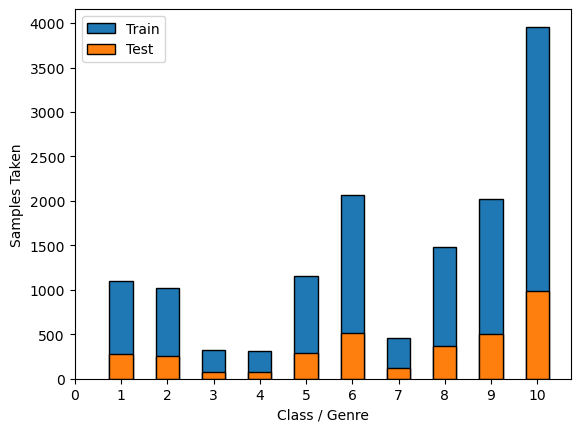

In [9]:
#Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

#Print the shapes of each set
print(f'X_train {X_train.shape}')
print(f'y_train {y_train.shape}')
print(f'X_test {X_test.shape}')
print(f'y_test {y_test.shape}')

#Create the bars for the histogram
plt.hist(y_train, bins=np.arange(0.5, 11.5, 1), rwidth = 0.5, label='Train', edgecolor='black')
plt.hist(y_test, bins=np.arange(0.5, 11.5, 1), rwidth = 0.5, label='Test', edgecolor='black')

#Show integers in the x axis accordingly
plt.xticks(np.arange(0, 11, 1))

#Labels
plt.ylabel('Samples Taken')
plt.xlabel('Class / Genre')

plt.legend()
plt.show()

As we can see from the histogram, we can compare the distribution of class labels between the training set and the test set. This graph helps in understanding the representativeness of the data in both training and test sets and ensures that both sets have similar distributions of class labels.

## 4.1 Multinomial Logistic Regression using SGD

To perform multinomial logistic regression, we must first take from `sklearn`'s `SGDClassifier` to create a logistic regression model.

### Instantiating the classifier

Lets instantiate an `SGDClassifier` object, setting the following hyperparameters:
- Loss function: 'log_loss'
- Initial learning rate: 0.005
- Learning rate: 'constant'
- Random state: random_state
- Verbose: 0

In [10]:
SGDModel = SGDClassifier(
    loss = 'log_loss',
    eta0 = 0.005,
    learning_rate = 'constant', 
    random_state = random_state,
    verbose = 0)

Now that we have our classifier, let us train the model using the `fit` function from `sklearn`.

In [11]:
SGDModel.fit(X_train, y_train)

SGDClassifier(eta0=0.005, learning_rate='constant', loss='log_loss',
              random_state=42)

After training, we'll use the `get_Score` function that was defined earlier to determine how precise our machine is.

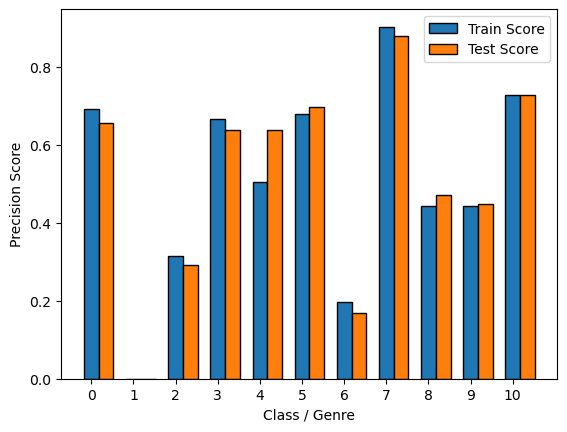

Train Avg Precision : 0.5057
Test Avg Precision : 0.5101


In [12]:
scores_SGD = get_Score(SGDModel, X_train, X_test, y_train, y_test)

The histogram shows that our machine learning model demonstrates varying levels of precision among the different genres. Some of the genres are classified with a high precision score, while some would have significantly lower scores. Notably, we can see that the precision scores on the test data would occasionally surpass those on the training data, which suggests potential overfitting. This implies that while the model performs well on the specific training examples, it may not generalize as effectively.

## 4.2 Multinomial Logistic Regression using Mini-Batch GD

Given that our attempts of performing Stochastic Gradient Descent have yielded below average precision results, we can attempt to train our machine using **Mini-Batch Gradient Descent** for more computational efficiency and stable convergence.

In [13]:
from sklearn.linear_model import SGDClassifier #Check why it suddenly needs to be reimported

In [14]:
MBGDModel = SGDClassifier(
    loss = 'log_loss',
    eta0 = 0.005,
    learning_rate = 'constant', 
    random_state = random_state,
    verbose = 0)

Import the `MiniBatch.py` file containing similar contents to the `data_loader.py` used in other notebooks.

In [15]:
from MiniBatch import MiniBatch

Given that the `MiniBatch` is centered around using **NumPy Arrays**, we alter the contents of the code to handle `Pandas`' dataframes, replacing direct indexing with `.iloc`.

Then, instantiate a `MiniBatch` and pass the `X` and `y` train sets, and a `batch_size` of `64` for the parameters.

In [16]:
MiniBatch = MiniBatch(X_train, y_train, 64)

Now using **Mini-Batch Gradient Descent**, we will train our model.

In [17]:
#Variables
epoch        = 0
maxEpochs    = 300
previousLoss = 0

isConverged  = False
labels       = np.unique(y_train)

while epoch < maxEpochs and isConverged is not True:
    loss = 0
    
    X_batch, y_batch = MiniBatch.get_batch()

    for X, y in zip(X_batch, y_batch):
        MBGDModel.partial_fit(X, y, classes=labels)
        
        y_pred = MBGDModel.predict_proba(X_train)
        loss += log_loss(y_train, y_pred)
        
    print('Epoch:', epoch + 1, '\tLoss:', (loss / len(X_batch)))
    
    if abs(previousLoss - loss) < 0.05:
        isConverged = True
    else:
        previousLoss = loss
        epoch += 1

Epoch: 1 	Loss: 1.6684512519969268
Epoch: 2 	Loss: 1.473440238833201
Epoch: 3 	Loss: 1.4399041361158962
Epoch: 4 	Loss: 1.4261603133533214
Epoch: 5 	Loss: 1.417819167385269
Epoch: 6 	Loss: 1.412278418960135
Epoch: 7 	Loss: 1.408477709172061
Epoch: 8 	Loss: 1.4058904327731778
Epoch: 9 	Loss: 1.4035378207868883
Epoch: 10 	Loss: 1.4019577262102452
Epoch: 11 	Loss: 1.3991713294978643
Epoch: 12 	Loss: 1.3980933710503065
Epoch: 13 	Loss: 1.3979945277137031


We can see that our model has converged in just a few epochs with a significantly low decrease in loss for each. This can be resolved by further hyperparameter tuning to achieve a higher precision score.

Lets visualize the precision score after our model was trained via **Mini-Batch Gradient Descent** using the `get_Score` function.

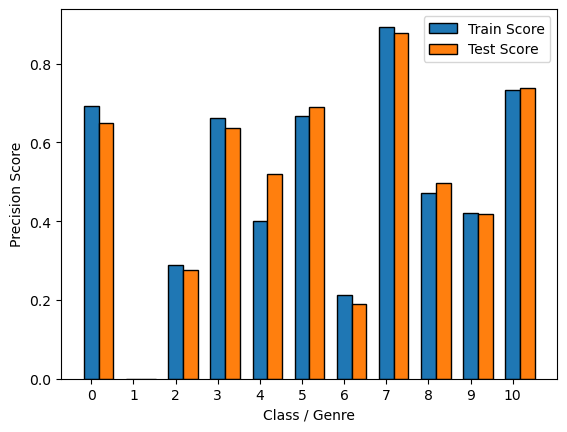

Train Avg Precision : 0.4946
Test Avg Precision : 0.4992


In [18]:
scores_MBGD = get_Score(MBGDModel, X_train, X_test, y_train, y_test)

Given our precision scores, our model performed somewhat poorer when using **Mini-Batch Gradient Descent** in comparison to using **Stochastic Gradient Descent**. Let us visualize the differences between the two in another histogram.

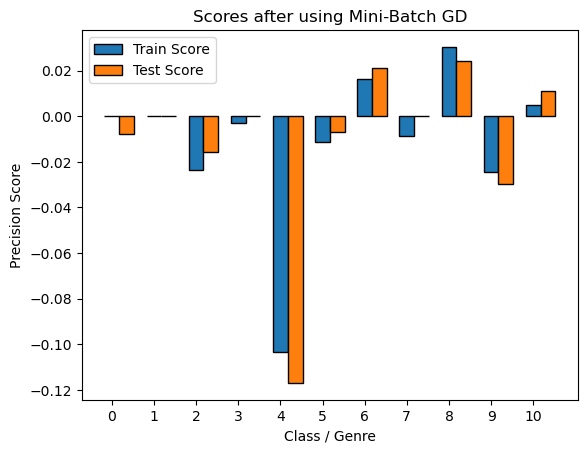

In [19]:
graph_Scores(np.array(scores_MBGD) - np.array(scores_SGD), 'Scores after using Mini-Batch GD')

## 4.3 Feature engineering through feature selection

To attempt to improve the performance of our model, we will perform `feature selection` to make the model more streamlined and effective by directing its focus only on the features that provide more meaningful or important information for predictions.

### Manual feature selection

Let us try to gauge the importance of each feature in the dataframe by retrieving the coefficients or weights of each feature in our `SGDModel`. Then graphing these accordingly in a histogram.

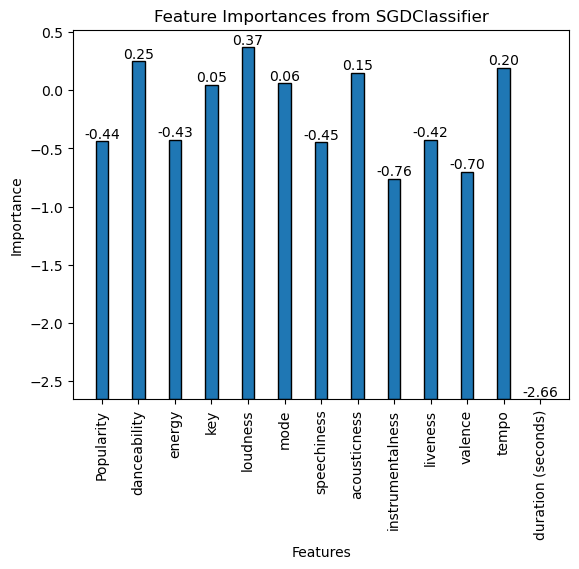

In [20]:
# Retrieve the coefficients from our SGD model
feature_importance = SGDModel.coef_[0]

# Match coefficients with feature names
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Convert the feature importance dictionary to two lists for plotting
features = list(feature_importance_dict.keys())
importances = list(feature_importance_dict.values())

# Find the minimum value of the importances
min_importance = min(importances)

# Makes the bars start from the minimum importance value
adjusted_importances = [importance - min_importance for importance in importances]

# Plot the feature importances as a bar chart
bars = plt.bar(features, adjusted_importances, width=0.35, edgecolor='black', bottom=min_importance)

# Add text labels above each bar
for bar, importance in zip(bars, importances):
    height = bar.get_height() + min_importance
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{importance:.2f}', ha='center', va='bottom')

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from SGDClassifier')
plt.xticks(rotation=90)

plt.show()

As seen from the histogram, the features with the least relevance to our model is `duration(seconds)`, `instrumentalness`, `valence`, and `mode` respectively. We will drop these features and see if it makes a significant difference in comparison to the previous fits using the `SGDClassifier`.

In [21]:
low_imp = X_train.columns.drop(['duration (seconds)', 'instrumentalness', 'valence', 'mode'])

#Instantiate another SGDClassifier
FS_SGDModel = SGDClassifier(
    loss = 'log_loss',
    eta0 = 0.005,
    learning_rate = 'constant', 
    random_state = random_state,
    verbose = 0)

#Train the model only with the low-importance features
FS_SGDModel.fit(X_train[low_imp], y_train)

SGDClassifier(eta0=0.005, learning_rate='constant', loss='log_loss',
              random_state=42)

Now we compare the precision of our model when using all of its features to using the low-importance features.

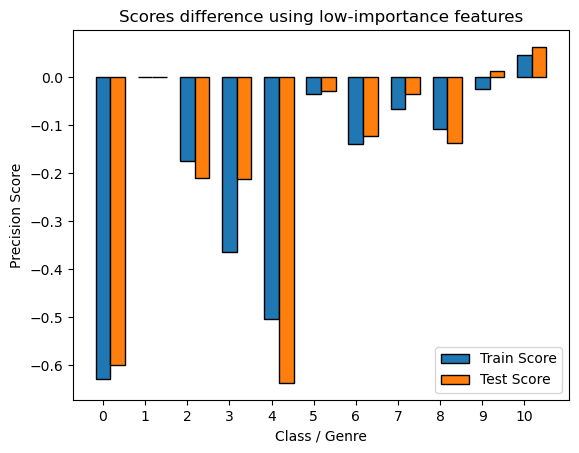

In [22]:
#Retrieve the precision score from the low-importance features
scores_FS = get_Score(FS_SGDModel, X_train[low_imp], X_test[low_imp], y_train, y_test, verbose = 0)

#Graph the score difference between basic SGD and SGD with the low-importance features
graph_Scores(np.array(scores_FS) - np.array(scores_SGD), 'Scores difference using low-importance features')

As we can see in the histogram, the performance of our model has plumetted from using only the low-importance features, indicating that we may receive more favorable results should we drop them. Let us instantiate another `SGDClassifier` class without using the said features.

In [23]:
included_ft = X_train.columns.drop([
              'Popularity', 'danceability', 'energy', 
              'key', 'loudness', 'speechiness', 
              'acousticness', 'liveness', 'tempo'])

#Instantiate another SGDClassifier
FS_SGDModel = SGDClassifier(
    loss = 'log_loss',
    eta0 = 0.005,
    learning_rate = 'constant', 
    random_state = random_state,
    verbose = 0)

#Train the model with the dropped features
FS_SGDModel.fit(X_train[included_ft], y_train)

SGDClassifier(eta0=0.005, learning_rate='constant', loss='log_loss',
              random_state=42)

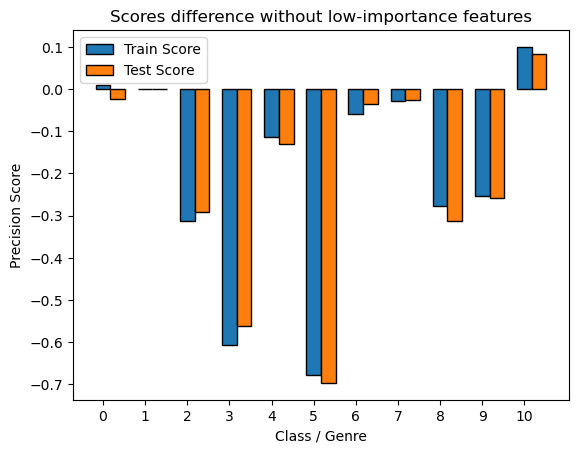

In [24]:
#Retrieve the precision score from the low-importance features
scores_FS = get_Score(FS_SGDModel, X_train[included_ft], X_test[included_ft], y_train, y_test, verbose = 0)

#Graph the score difference between basic SGD and SGD with the low-importance features
graph_Scores(np.array(scores_FS) - np.array(scores_SGD), 'Scores difference without low-importance features')

For our feature selection method, we will use the **Univariate Feature Selection** for simplicity as it is model-independent while being quick and efficient. To perform this, we will use the `SelectKBest` method from `sklearn`selects the top `k` features based on its importance based on statistical testings.

Import `SelectKBest`, `f_classif`, `make_pipeline` and `StandardScaler`.

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

Create the pipeline using the `create_pipeline` function for both our **SGDClassifier** and **MBGDClassifier**

In [26]:
SGD_Pipeline = make_pipeline(
    StandardScaler(),
    SelectKBest(score_func=f_classif, k=10),
    SGDClassifier(loss = 'log_loss', eta0 = 0.005, learning_rate = 'constant', random_state = random_state))

Train the models accordingly.

In [27]:
SGD_Pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest', SelectKBest()),
                ('sgdclassifier',
                 SGDClassifier(eta0=0.005, learning_rate='constant',
                               loss='log_loss', random_state=42))])

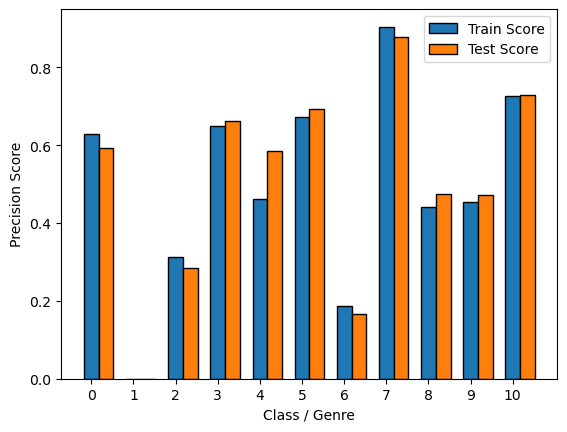

Train Avg Precision : 0.4941
Test Avg Precision : 0.5033


In [28]:
score_UFS = get_Score(SGD_Pipeline, X_train, X_test, y_train, y_test)

## 4.4 Regularization and hyperparameter tuning

## 4.5 Cross Validation